In [1]:
# pip uninstall -y gensim

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Supervized learning with doc2vec
        </h1>
    </div>
</div>

- **[Entrainement doc2vec](#en)**

- **[Association de nos modeles ](#as)**

- **[GridSearch](#gri)**

- **[Resultat](#re)**

- **[Resultat par modeles](#mo)**


Doc2vec est un outil NLP pour représenter des documents sous forme de vecteur et est une généralisation de la méthode word2vec .


Le modèle Doc2Vec, contrairement au modèle Word2Vec, est utilisé pour créer une représentation vectorisée d'un groupe de mots pris collectivement comme une seule unité. Il ne donne pas seulement la simple moyenne des mots dans la phrase.




Essayons de comprendre Doc2Vec en le comparant à Word2Vec. 

- Alors que Word2Vec calcule un vecteur de caractéristiques pour chaque mot du corpus, Doc2Vec calcule un vecteur de caractéristiques pour chaque document du corpus.

- Alors que Word2Vec travaille sur l'intuition que la représentation des mots doit être assez bonne pour prédire les mots environnants , l'intuition sous-jacente de Doc2Vec est que la représentation du document doit être assez bonne pour prédire les mots dans le document .




Configurer les modèles de formation et d'évaluation Doc2Vec

Tout d'abord, nous instancions un modèle doc2vec - Distributed Bag of Words (DBOW). Dans l'architecture word2vec, les deux noms d'algorithmes sont "continuous bag of words" (CBOW) et "skip-gram" (SG) ; dans l'architecture doc2vec, les algorithmes correspondants sont la « mémoire distribuée » (DM) et le « sac de mots distribué » (DBOW).

**Sac de mots (DBOW)**

- DBOW est le modèle doc2vec analogue au modèle Skip-gram dans word2vec. Les vecteurs de paragraphe sont obtenus en formant un réseau neuronal sur la tâche de prédire une distribution de probabilité de mots dans un paragraphe étant donné un mot échantillonné au hasard à partir du paragraphe.

Nous ferons varier les paramètres suivants :

 dm=0, sac de mots distribué (PV-DBOW) est utilisé ;

 dm=1la 'mémoire distribuée' (PV-DM) est utilisée.

Vecteurs de 300 dimensions.

min_count=2,  ignore tous les mots dont la fréquence totale est inférieure à celle-ci.

negative=5, spécifie combien de "mots parasites" doivent être dessinés.

hs=0, et négatif est différent de zéro, un échantillonnage négatif sera utilisé.


sample=0, le seuil pour configurer quels mots de fréquence plus élevée sont sous-échantillonnés de manière aléatoire.

workers=cores, utilisez ces nombreux threads de travail pour former le modèle (= formation plus rapide avec des machines multicœurs).



**Mémoire distribuée (DM)**

- La mémoire distribuée (DM) agit comme une mémoire qui se souvient de ce qui manque dans le contexte actuel . Alors que les vecteurs de mots représentent le concept d'un mot, le vecteur de document vise à représenter le concept d'un document. Nous instancions à nouveau un modèle Doc2Vec avec une taille de vecteur de 300 mots et itérant 30 fois sur le corpus d'apprentissage.

In [2]:
# from google.colab import drive
# drive.mount('/content/ShardDrives/', force_remount=True)

In [3]:
# pip install  gensim===3.2.1

In [4]:
# pip uninstall pyLDAvis

In [5]:
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user

In [1]:
# Import Python libraries
import os
import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
import unicodedata
from bs4 import BeautifulSoup
# from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

from IPython.core.display import display, HTML
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import timeit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, recall_score, precision_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import HistGradientBoostingClassifier, RandomTreesEmbedding, VotingClassifier, StackingClassifier

In [2]:
from sklearn.multioutput import ClassifierChain, MultiOutputRegressor, MultiOutputClassifier, RegressorChain
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet, RidgeClassifier
from sklearn.svm import LinearSVC
from scipy.stats import reciprocal, uniform

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

In [4]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [10]:
# !python -m pip install -U gensim

In [5]:
# import utils own functions
import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/media/ismail/Elements/formation/livrable/P5_azdad_ismail/utils.py'>

In [12]:
# pip install  gensim===4.1.1

In [6]:
data = pd.read_csv("stackoverflow_cleaned.csv", sep=";", 
                   index_col=0,
                   converters={
                       "tags": literal_eval,
                       "text": literal_eval
                   }
                   )
data.head()

,tags,full_text,text,score
Id,,,,
5767325,"[javascript, arrays]",How can I remove a specific item from an array? I have an array of numbers and I'm using the method to add elements to it.\nIs there a simple way to remove a specific element from an array?\nI'm looking for the equivalent of something like:\n\nI have to use core JavaScript. Frameworks are not allowed.\n,"[item, array, array, number, method, element, way, element, array, equivalent, something, core, javascript, framework]",10385
7244321,[git],"How do I update or sync a forked repository on GitHub? I forked a project, applied several fixes and created a pull request which was accepted. A few days later, another change was made by another contributor. So my fork doesn't contain that change.\nHow can I get that change into my fork? Do I need to delete and re-create my fork when I have further changes to contribute? Or is there an update button?\n","[repository, github, project, fix, pull, request, day, change, contributor, fork, change, change, fork, fork, change, update, button]",4359
8710619,[java],"Why don't Java's +=, -=, *=, /= compound assignment operators require casting? Until today, I thought that for example:\n\nWas just a shortcut for:\n\nBut if we try this:\n\nThen will not compile but will compile fine.\nDoes it mean that in fact is a shortcut for something like this\n?\n","[java, compound, assignment, operator, today, example, shortcut, fact, shortcut, something]",3779
6245570,[git],"How to get the current branch name in Git? I'm from a Subversion background and, when I had a branch, I knew what I was working on with ""These working files point to this branch"".\nBut with Git I'm not sure when I am editing a file in NetBeans or Notepad++, whether it's tied to the master or another branch.\nThere's no problem with in bash, it tells me what I'm doing.\n","[branch, name, git, subversion, background, branch, file, point, branch, git, file, netbeans, master, branch, problem, bash]",3372
8467424,[bash],"Echo newline in Bash prints literal \n In Bash, tried this:\n\nBut it doesn't print a newline, only . How can I make it print the newline?\nI'm using Ubuntu 11.04 (Natty Narwhal).\n","[echo, newline, bash, print, bash, newline, newline, ubuntu, natty, narwhal]",3050


In [20]:
data[data['tags'].str.len()>4].sample(5)

,tags,full_text,text,score
Id,,,,
38222995,"[javascript, php, jquery, html, css]","How to scroll div contents vertically in a loop like news feed in php page I'm making a Php webpage right now and would like to have a little ""News"" DIV on the right. that has auto scrolling vertical text as soon as the page loads. But, the below code not working in php page.\n\nAlso, can it possible that on Mouseover to stop the scroll and on mouse out scrolling starts continue in a loop.\nI've tried searching for the correct code, but nothing has worked thus far. \n"" I'm just so frustrated now ! "" \nAny help would be immensely appreciated!\n","[div, content, loop, news, feed, php, page, php, webpage, news, div, right, auto, text, page, load, code, php, page, mouseover, scroll, mouse, scrolling, start, loop, code, nothing, help]",8
40245993,"[javascript, jquery, html, css, google-chrome]","HTML select box is displaying below windows task bar in chrome I am trying to add an html dropdown using the select tag and unfortunately in chrome I am unable to select option 5 and 6 as they are being displayed below the task bar in chrome on windows. If I add an option 7 then suddenly the list displays above instead of below.\n \nThis list will always be changing sizes so unfortunately positioning the list higher will not be an option as there is always the possibility of 2 options being hidden. Furthermore, the number of items displayed in the list is before a scroll bar is added is browser specific. See Height of an HTML select box (dropdown)\nWhat I've tried so far:\n\nTried converting the dropdown list to a static list when there are more than 4 options using jquery and setting list size. This however was very ugly.\nTried using bootstraps .dropup class but this unfortunately only works with list items not select options\nDifferent css hacks but as mentioned earlier the list size is browser specific.\n\nI would rather not add in any external libraries and find some kind of simple Jquery hack to fix this. You can also see what I mean by visiting this jsfiddle link and dragging the display window to the bottom of the screen:\n\nhttps://jsfiddle.net/v9t4rm16/\n","[html, box, window, task, bar, chrome, html, dropdown, tag, chrome, option, task, bar, chrome, window, option, list, display, list, size, list, option, possibility, option, number, item, list, scroll, bar, browser, height, html, select, box, dropdown, dropdown, list, list, option, jquery, list, size, bootstrap, class, list, item, option, cs, hack, list, size, browser, library, kind, jquery, hack, jsfiddle, link, display, window, bottom, screen]",9
36820326,"[c++, c, arrays, string, pointers]",Why can't we declare an array of numbers using integer pointer \nWhy some of the above statements are valid while others are invalid?\n,"[array, number, pointer, statement, others]",9
15819919,"[java, php, javascript, .net, regex]","Where can I find unit tests for regular expressions in multiple languages? I'm building a regex helper at http://www.debuggex.com. The amount of detail I want to show requires me to write my own parser and matcher.\nTo make sure my parser and matcher work correctly, I've written my own unit tests for the Javascript flavor of regexes, but these only cover edge cases I know about. I would like to use a standard test suite, and was recently pointed to http://hg.ecmascript.org/tests/test262/summary, which I will be using.\nMy question is, where can I find such test suites for other regex flavors? I'd like to support other flavors in the future. I have not been able to find anything by googling (""test"" pollutes the results with regex testers). I am looking for test suites for the languages python, php, perl, java, ruby, and .net.\n","[unit, test, expression, language, regex, helper, amount, detail, parser, matcher, parser, matcher, work, unit, test, javascript, flavor, regexes, cover, edge, case, test, suite, question, test, suite, regex, flavor, flavor, future, anything, test, 

<a name='en'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          entrainement 
        </h1>
    </div>
</div>

In [14]:
from gensim.models import Doc2Vec
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [15]:
from gensim.models.doc2vec import TaggedDocument

In [16]:
def getMetrics(model,name,X_test, y_test):
    frames=[]
    frame = pd.DataFrame()
    y_pred = model.predict(X_test) 
    frame['estimator'] = [name]  
    frame['accuracy'] = np.round((accuracy_score(y_test, y_pred)), 5)
    frame['f1_macro'] = np.round(f1_score(y_test, y_pred, average="macro"), 3)
    frame['f1_micro'] = np.round(f1_score(y_test, y_pred, average="micro"), 3)
    frame['jaccard'] = np.round(jaccard_score(y_test, y_pred, average="weighted"), 3)
#     frame['recall'] = np.round(recall_score(y_test, y_pred, average="weighted"), 3)
#     frame['precision'] = np.round(precision_score(y_test, y_pred, average="weighted"), 3)                            
    frames.append(frame)
    return pd.concat(frames) 

In [17]:
import multiprocessing
cores = multiprocessing.cpu_count()
cores

8

In [18]:
X = data["text"]
y = data['tags']

train, test = train_test_split(data[['text','tags']], test_size=0.2, random_state=42)

In [19]:

train_tagged = train.apply(
    lambda r: TaggedDocument(words=r['text'], tags=r['tags']), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=r['text'], tags=r['tags']), axis=1)

In [20]:
train_tagged.values[30]

TaggedDocument(words=['segmentation', 'fault', 'dlclose', 'android', 'platform', 'problem', 'loading', 'api', '(', 'android', 'ndk', 'standalone', 'toolchain', 'version', ')', 'application', 'library', 'android', 'version', 'froyo', 'source', 'code', 'library', 'program', 'source', 'code', 'library', 'source', 'everything', 'stl', 'function', 'class', 'program', 'segmentation', 'fault', 'function', 'example', 'source', 'code', 'library', 'code', 'program', 'segmentation', 'fault', 'function', 'exit', 'couple', 'test', 'result', 'stl', 'everything', 'stl', 'end', 'everything', 'compilation', 'flag', 'result', 'code', 'stl'], tags=['android', 'c++', 'linux'])

In [21]:
train_tagged.values[0]

TaggedDocument(words=['core', 'web', 'app', 'project', 'google', 'foo', 'anything', 'answer', 'answer', 'documentation', 'something', 'project'], tags=['c#', 'asp.net'])

test avec dbow

In [22]:
model_dbow = Doc2Vec(dm=0, vector_size=200, negative=5, hs=0, min_count=2, sample = 0, workers=cores)

In [23]:
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|████████████████████████████████| 74960/74960 [00:00<00:00, 3108735.05it/s]


In [24]:
len(train_tagged.values)

74960

In [25]:
from sklearn import utils as utilscikit

for epoch in range(30):
    model_dbow.train(utilscikit.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|████████████████████████████████| 74960/74960 [00:00<00:00, 3971365.04it/s]


Creation de nos features doc2vec

In [26]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [27]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [28]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
getMetrics(logreg,'logreg',X_test, y_test)

/home/ismail/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,estimator,accuracy,f1_macro,f1_micro,jaccard
0,logreg,0.2042,0.034,0.204,0.093


In [29]:
result = pd.DataFrame()
y_test_predicted_labels = logreg.predict(X_test)
result['True_Tag'] = y_test
result['predicted_Tag'] =y_test_predicted_labels
result.head()

,True_Tag,predicted_Tag
0,python,java
1,python,c++
2,c#,c++
3,python,c++
4,python,javascript


test avec dmm

In [30]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged)])

100%|████████████████████████████████| 74960/74960 [00:00<00:00, 1101312.96it/s]


In [31]:
from sklearn import utils as utilscikit

for epoch in range(30):
    model_dmm.train(utilscikit.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dbow.alpha

100%|████████████████████████████████| 74960/74960 [00:00<00:00, 3769663.66it/s]


In [32]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

In [33]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

/home/ismail/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing accuracy 0.15634171068779681
Testing F1 score: 0.08868677693054795


In [34]:
getMetrics(logreg,'logreg',X_test, y_test)

,estimator,accuracy,f1_macro,f1_micro,jaccard
0,logreg,0.15634,0.015,0.156,0.049


In [35]:
result = pd.DataFrame()
y_test_predicted_labels = logreg.predict(X_test)
result['True_Tag'] = y_test
result['predicted_Tag'] =y_test_predicted_labels
result.head()

,True_Tag,predicted_Tag
0,python,javascript
1,python,javascript
2,c#,c++
3,python,c++
4,python,c++


<a name='as'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Association de nos modeles 
        </h1>
    </div>
</div>

- Selon le tutoriel Gensim doc2vec sur l'ensemble de données de sentiment IMDB, la combinaison d'un vecteur de paragraphe de Distributed Bag of Words (DBOW) et Distributed Memory (DM) améliore les performances. Nous suivrons, en associant les modèles pour l'évaluation.

In [1]:
pip install testfixtures

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Concatenate two models.

In [37]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

#### Creation des vecteurs pour la classifier

In [38]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [39]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

Test simple de nos features

In [40]:
logregPairing = LogisticRegression(n_jobs=1, C=1e5)
logregPairing.fit(X_train, y_train)
getMetrics(logregPairing,'logregPairing',X_test, y_test)

/home/ismail/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,estimator,accuracy,f1_macro,f1_micro,jaccard
0,logregPairing,0.20922,0.035,0.209,0.096


In [41]:
result = pd.DataFrame()
y_test_predicted_labels = logregPairing.predict(X_test)
result['True_Tag'] = y_test
result['predicted_Tag'] =y_test_predicted_labels
result.head()

,True_Tag,predicted_Tag
0,python,java
1,python,javascript
2,c#,c++
3,python,c++
4,python,python


<a name='gri'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          gridsearch
        </h1>
    </div>
</div>


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import RidgeCV
import warnings
warnings.filterwarnings("ignore")


class nlpEstimatorAlgo:

    def __init__(self, models, params):
        self.models = models
        self.keys = models.keys()
        self.params = params
        self.grid_searches = {}
        self.bestParams = {}
        self.scorer = {}
        self.cv_results = {}
        self.scoring = {
            "accuracy": "accuracy",
            "f1": "f1",
                        "jaccard": "jaccard",
                        "recall": "recall",
                        "precision": "precision"
        }
#         self.kfold = KFold(n_splits=5, random_state=0)
        self.kfold = KFold(n_splits=5)
#         self.kfold = StratifiedKFold(n_splits=5)

    def fit(self, X_train, y_train):
        starttotaltime = timeit.default_timer()
        for model_name in self.keys:
            print('Running GridSearchCV for %s.' % model_name)
            starttime = timeit.default_timer()
            model = self.models[model_name]
            params = self.params[model_name]
            print('training model', model)
            # GridSearchCV
            # RandomizedSearchCV

            pipeline = Pipeline([
#                 (model_name,model)
                (model_name, OneVsRestClassifier(model)),
                #                 (model_name,ClassifierChain(model)),
                #                 (model_name,MultiOutputClassifier(model)),
                #                 (model_name,RegressorChain(model)),
            ])

            grid_search = GridSearchCV(
                pipeline,
                params,
                # n_iter = 5,
                # scoring = self.scoring,
                scoring="f1_weighted",
                # scoring = {
                #             "f1_weighted" : "f1_weighted",
                #             "accuracy" : "accuracy",
                #             },
                return_train_score=True,
                refit=True,
                # refit="f1_weighted",
                cv=self.kfold,
                n_jobs=-1,

            )


#             print(grid_search.get_params().keys())
            grid_search.fit(X_train, y_train)
            self.bestParams[model_name] = grid_search.best_params_
            self.scorer[model_name] = grid_search.best_estimator_
            self.grid_searches[model_name] = grid_search
            self.cv_results[model_name] = grid_search.cv_results_

            elapsed = timeit.default_timer() - starttime
            print('training {} model done'.format(model_name))
            print("elapsed time {:.2f}s".format(elapsed))
        print('All training done.')
        elapsed = timeit.default_timer() - starttotaltime
        print("total time {:.2f}s".format(elapsed))

    def getBestParams(self):
        return self.bestParams

    def showBestParams(self, useindex=False):
        frames = []
        result = pd.DataFrame()
        for name, bestParams in self.bestParams.items():
            frame = pd.DataFrame()
            frame['estimator'] = [name]
            frame['best_params'] = [bestParams]
            frames.append(frame)
        result = pd.concat(frames)
        result = result.reset_index()
        if(useindex):
            result.set_index('estimator', inplace=True)
        result = result.drop(['index'], 1)
        return result

    def getGetScorer(self):
        return self.scorer

    def getCvResults(self):
        return sel.cv_results_

    def getPredictionsResult(self, name, X_test):
        # Predict        
        result = pd.DataFrame()
        y_test_predicted_labels = algo_estimator.grid_searches[name].predict(X_test)
        result['True_Tag'] = y_test
        result['predicted_Tag'] =y_test_predicted_labels
        return result
                


    def getClassificationReport(self, name, y_test, X_test):
        y_test_predicted_labels = self.grid_searches[name].predict(X_test)
        print('accuracy model {} : {}'.format(
            name, accuracy_score(y_test_predicted_labels, y_test)))
        report_dict = classification_report(
            y_test, y_test_predicted_labels, output_dict=True)
        return pd.DataFrame(report_dict).T

     # renvoie les meilleurs resulats par modele contenu tester sur les variables test

    def getBestModeleScore_scorePrediction(self, useIndex=True):
        frames = []
        result = pd.DataFrame()
        for name, grid_search in self.grid_searches.items():
            frame = pd.DataFrame()
            # grid_search.predict(X_test) is equivalent to grid_search.best_estimator_.predict(X_test)
            # Inverse transform
            y_pred = grid_search.predict(X_test)
            frame['estimator'] = [name]
            frame['accuracy'] = np.round((accuracy_score(y_test, y_pred)), 5)
            frame['f1_macro'] = np.round(
                f1_score(y_test, y_pred, average="macro"), 3)
            frame['f1_micro'] = np.round(
                f1_score(y_test, y_pred, average="micro"), 3)
            frame['jaccard'] = np.round(jaccard_score(
                y_test, y_pred, average="weighted"), 3)
            frame['recall'] = np.round(recall_score(
                y_test, y_pred, average="weighted"), 3)
            frame['precision'] = np.round(precision_score(
                y_test, y_pred, average="weighted"), 3)
            frames.append(frame)
        result = pd.concat(frames)
        result = result.reset_index()
        if(useIndex is True):
            result.set_index('estimator', inplace=True)
        result = result.drop(['index'], 1)
        return result

    # affiche les meilleurs resulats par modele contenu tester sur les variables test
    def getBestModeleScore_graphpredictions(self, X_test):
        plt.rcParams['font.size'] = '10'
        ax = self.getBestModeleScore_scorePrediction(
            True).plot(kind='bar', figsize=(15, 6))
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x()
                        * 1.005, p.get_height() * 1.005))

        plt.legend(loc=2)
        plt.title(
            'Resultats des meilleurs predictions par modeles apres hyperparametrisations')
        plt.show()

#     Generate 3 plots: the test and training learning curve, the training
#     samples vs fit times curve, the fit times vs score curve.
    def getLearningCurveByName(self, model_name, X_train, y_train):
        # Results from grid search
        grid = self.grid_searches[model_name]
        title = "learning curve for model {}".format(model_name)
        estimator = grid.best_estimator_
        estimator = grid.best_estimator_
        utils.plot_learning_curve(
            estimator, title, X_train, y_train, ylim=None, cv=self.kfold, n_jobs=4
        )
        plt.show()

    # Show validation between real values vs predicted values
    def showPredictionbyName(self, name, target, X_train, y_train):
        plot_cross_val_predi(
            self.grid_searches[name].best_estimator_, name, target, X_train, y_train, cv=self.kfold)


models = {
    'SGDClassifier': SGDClassifier(),
    'logistic': LogisticRegression(),
    'RidgeClassifier': RidgeClassifier(),
#         'randomForest': RandomForestClassifier(),

}

params_models = {

    'SGDClassifier': {
        # number of epochs
        'SGDClassifier__estimator__max_iter': [1000],
        # logistic regression,
        'SGDClassifier__estimator__loss': ['log'],
        'SGDClassifier__estimator__penalty': ['l1', 'l2'],
        'SGDClassifier__estimator__n_jobs': [-1]
    },

            'logistic': 
                            {
                              "logistic__estimator__C": [10, 1.0, 0.1],
                                'logistic__estimator__max_iter': [1000],
                              "logistic__estimator__penalty": ["l1", "l2"],
                              "logistic__estimator__dual": [False],
                            },


    'RidgeClassifier': {
        'RidgeClassifier__estimator__max_iter': [1500, 2000, 3000],
        'RidgeClassifier__estimator__alpha': np.arange(0.1, 1, .2).tolist(),
        'RidgeClassifier__estimator__solver': ['auto', 'cholesky']
    },

#     'randomForest' :{
#                       "randomForest__estimator__max_depth": [300,500,  ],
#                       "randomForest__estimator__min_samples_leaf": [1, 5, 10],
#                       "randomForest__estimator__class_weight": ["balanced"]
#                      }

}

algo_estimator = nlpEstimatorAlgo(models, params_models)
algo_estimator.fit(X_train[0:30000], y_train[0:30000])

<a name='re'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          resultat
        </h1>
    </div>
</div>

Malheuresement nos resultats sont moins bon qu avec word2vec ou tf-idf...

Nous n allons pas selectionner les models doc2vec pour mise en production

In [52]:
algo_estimator.getBestModeleScore_scorePrediction(X_test)

,estimator,accuracy,f1_macro,f1_micro,jaccard,recall,precision
0,SGDClassifier,0.20330,0.030,0.203,0.085,0.203,0.154
1,logistic,0.22512,0.044,0.225,0.106,0.225,0.195
2,RidgeClassifier,0.22902,0.036,0.229,0.104,0.229,0.202


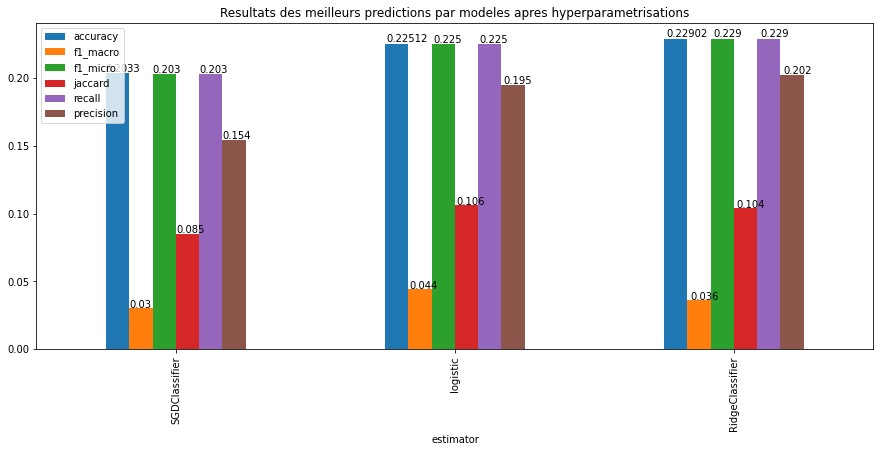

In [53]:
algo_estimator.getBestModeleScore_graphpredictions(X_test)

In [54]:
algo_estimator.showBestParams()

,estimator,best_params
0,SGDClassifier,"{'SGDClassifier__estimator__loss': 'log', 'SGDClassifier__estimator__max_iter': 1000, 'SGDClassifier__estimator__n_jobs': -1, 'SGDClassifier__estimator__penalty': 'l1'}"
1,logistic,"{'logistic__estimator__C': 10, 'logistic__estimator__dual': False, 'logistic__estimator__max_iter': 1000, 'logistic__estimator__penalty': 'l2'}"
2,RidgeClassifier,"{'RidgeClassifier__estimator__alpha': 0.1, 'RidgeClassifier__estimator__max_iter': 1500, 'RidgeClassifier__estimator__solver': 'auto'}"


<a name='mo'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Resultat par modeles
        </h1>
    </div>
</div>

Dans cette partie nous allons analyser plus en detail chaque modele.

- La prediction de tag realiser par le modele vs tag reel
    
- la learning curve du modele (si il y a Under/Over fitting)
    
-  ainsi que la classification report par tag
    

,True_Tag,predicted_Tag
0,python,java
1,python,javascript
2,c#,c++
3,python,c++
4,python,python
5,c,c++
6,sql,javascript
7,c#,javascript
8,javascript,java
9,php,c++


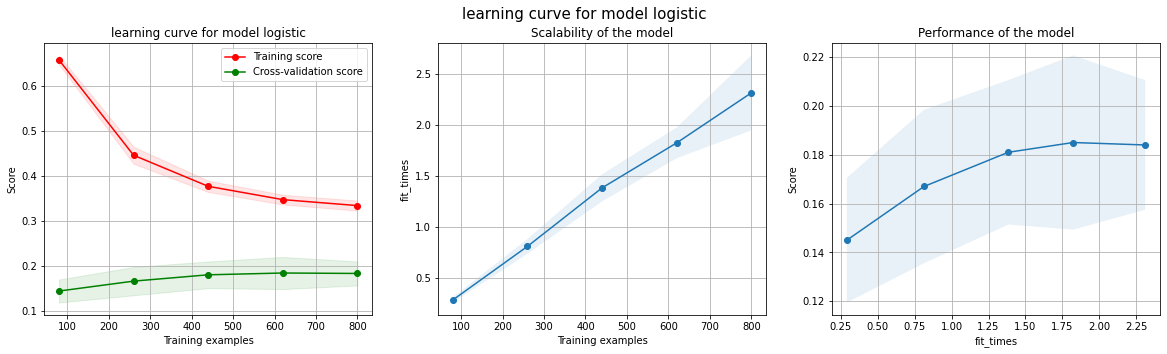

accuracy model logistic : 0.22512139160130196


,precision,recall,f1-score,support
.net,0.000000,0.000000,0.000000,76.000000
algorithm,0.166667,0.008197,0.015625,244.000000
android,0.253623,0.184697,0.213740,1137.000000
angular,0.000000,0.000000,0.000000,186.000000
angularjs,0.000000,0.000000,0.000000,74.000000
arrays,0.000000,0.000000,0.000000,53.000000
asp.net,0.000000,0.000000,0.000000,83.000000
bash,0.000000,0.000000,0.000000,88.000000
c,0.148148,0.004969,0.009615,805.000000
c#,0.214914,0.244402,0.228712,2099.000000


In [55]:
display(algo_estimator.getPredictionsResult('logistic', X_test).head(10))
algo_estimator.getLearningCurveByName(
    'logistic', X_train[0:1000], y_train[0:1000])
algo_estimator.getClassificationReport("logistic", y_test, X_test)

,True_Tag,predicted_Tag
0,python,javascript
1,python,javascript
2,c#,javascript
3,python,c++
4,python,javascript
5,c,c++
6,sql,javascript
7,c#,javascript
8,javascript,javascript
9,php,c++


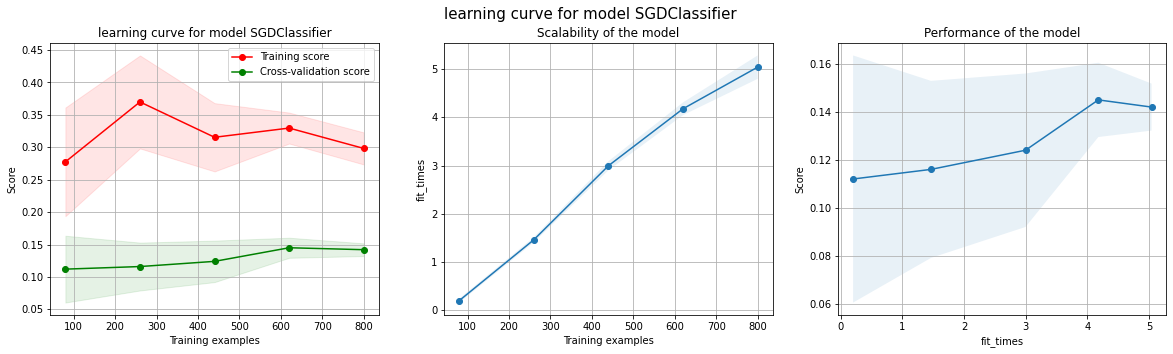

accuracy model SGDClassifier : 0.2032975828397631


,precision,recall,f1-score,support
.net,0.000000,0.000000,0.000000,76.000000
algorithm,0.000000,0.000000,0.000000,244.000000
android,0.218268,0.161829,0.185859,1137.000000
angular,0.000000,0.000000,0.000000,186.000000
angularjs,0.000000,0.000000,0.000000,74.000000
arrays,0.000000,0.000000,0.000000,53.000000
asp.net,0.000000,0.000000,0.000000,83.000000
bash,0.000000,0.000000,0.000000,88.000000
c,0.000000,0.000000,0.000000,805.000000
c#,0.216290,0.113864,0.149189,2099.000000


In [56]:
display(algo_estimator.getPredictionsResult('SGDClassifier', X_test).head(10))
algo_estimator.getLearningCurveByName('SGDClassifier', X_train[0:1000], y_train[0:1000])
algo_estimator.getClassificationReport("SGDClassifier", y_test, X_test)

,True_Tag,predicted_Tag
0,python,java
1,python,python
2,c#,java
3,python,c++
4,python,javascript
5,c,c++
6,sql,javascript
7,c#,javascript
8,javascript,java
9,php,c++


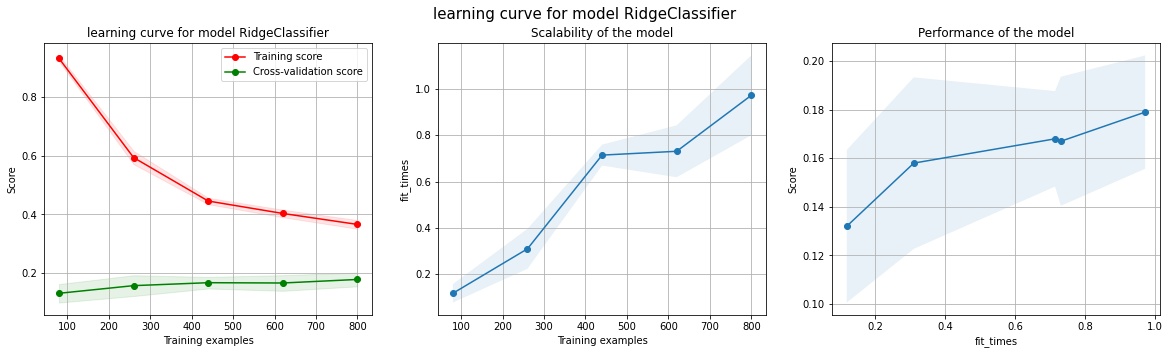

accuracy model RidgeClassifier : 0.22901659463209006


,precision,recall,f1-score,support
.net,0.000000,0.000000,0.000000,76.000000
algorithm,1.000000,0.004098,0.008163,244.000000
android,0.323864,0.150396,0.205405,1137.000000
angular,0.000000,0.000000,0.000000,186.000000
angularjs,0.000000,0.000000,0.000000,74.000000
arrays,0.000000,0.000000,0.000000,53.000000
asp.net,0.000000,0.000000,0.000000,83.000000
bash,0.000000,0.000000,0.000000,88.000000
c,0.000000,0.000000,0.000000,805.000000
c#,0.220811,0.256789,0.237445,2099.000000


In [57]:
display(algo_estimator.getPredictionsResult('RidgeClassifier', X_test).head(10))
algo_estimator.getLearningCurveByName(
    'RidgeClassifier', X_train[0:1000], y_train[0:1000])
algo_estimator.getClassificationReport("RidgeClassifier", y_test, X_test)

<div class="bg-primary text-lg-left text-white">
    <div>
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          API disponlible
        </h1>
    </div>

</div>
    <div class="text-lg-left ">
       <a href="https://github.com/ismailazdad/stackoverflowTags" target="_blank">stackoverflow</a>
    </div>
     <div>       
       <a href="http://ismail2233.pythonanywhere.com/" target="_blank">online version</a>
    </div>

